![vki_logo](https://www.skywin.be/sites/default/files/logo-membres/vki_logo_blue_rectangular.jpg)
### MODULO: A package for Multiscale Proper Orthogonal Decomposition
#### Tutorial 3: POD vs KL decomposition (or kPOD)

This third tutorial compares the POD and the generalized Karhunen–Loève (KL) expansion. These decompositions are conceptually very similar; it can be shown in fact that the first is a special case of the second.

In the generalized KL, the temporal basis is provided by the eigenvectors of a kernel matrix that measure the similarity between the various snapshots. In the POD, this kernel matrix is simple K=D^T D, that is the temporal correlation matrix. This is a linear measure of similarity between the snapshots (the columns of D).

In the KL implemented in MODULO, the kernel matrix is computed via 'pairwise_kernels' from sklearn.metrics.pairwise (see [this](https://www.cambridge.org/core/books/datadriven-fluid-mechanics/0327A1A43F7C67EE88BB13743FD9DC8D)).

We here analyze the difference between POD and kPOD on the same dataset we have used in exercise 1. Therefore, the first part is mostly a copy-paste from exercise 01 to download the data and compute the POD. 

#### Part 1: taken from ex01. 
Download the data and compute POD. For the sake of the exercise, we compute the POD differntly here, namely using the SVD. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import shutil 

from modulo_vki.utils.others import Animation_2D_CFD_Cyl, Plot_2D_CFD_Cyl
from modulo_vki import ModuloVKI

from modulo_vki.utils.read_db import ReadData # we will use it only to remove the mean

plt.ion()

# This is for plot customization
fontsize = 16
plt.rc('text', usetex=True)      
plt.rc('font', family='serif')
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['font.size'] = fontsize

#%% Download the data
 
# Prepre the folder with the outputs 
FOLDER = 'Tutorial_3_kPOD_vs_POD_Cyl'
# create the data folder
if not os.path.exists(FOLDER):
    os.mkdir(FOLDER)

decompositions = ['kPOD', 'POD']

for decomp in decompositions:
    os.makedirs(FOLDER+ os.sep + f'{decomp}_Results_Cylinder_CFD', 
                exist_ok=True)

  

In [2]:
# First we unzip the file 
import urllib.request
print('Downloading Data for Ex 3...')
url = 'https://osf.io/emgv2/download'
urllib.request.urlretrieve(url, 'Ex_7_2D_CFD.zip')
print('Download Completed! I prepare data Folder')
# Unzip the file 
from zipfile import ZipFile
String='Ex_7_2D_CFD.zip'
zf = ZipFile(String,'r')
zf.extractall('./')
zf.close()   
shutil.move('Ex_7_2D_Cylinder_CFD', FOLDER) # rename the data flolder to FOLDER
os.rename(FOLDER+'/Ex_7_2D_Cylinder_CFD',FOLDER+os.sep+'data')
os.remove(String) # Delete the zip file with the data 
print('Data set unzipped and ready ! ')

Download Completed! I prepare data Folder
Data set unzipped and ready ! 


In [3]:
# Read one snapshot and plot it 
U=np.loadtxt(FOLDER + os.sep+ 'data/U_Cyl.txt')                              # U component
V=np.loadtxt(FOLDER + os.sep+ 'data/V_Cyl.txt')                              # V component
X=np.loadtxt(FOLDER + os.sep+ 'data/X_Cyl.txt')                            # X coordinates
Y=np.loadtxt(FOLDER + os.sep+ 'data/Y_Cyl.txt')                            # Y coordinates

# We rebuild the mesh
Xg,Yg=np.meshgrid(X,Y)
n_x=len(Y); n_y=len(X); nxny=n_x*n_y
n_s=2*nxny; n_t=np.shape(U)[1]

dt=1/1000
t=np.arange(0,n_t)*dt
Freqs=np.fft.fftfreq(n_t)*1/dt # Compute the frequency bins

# Crete the snapshot Matrix:
D = np.zeros((n_s, n_t))

for k in range(0, n_t):
    print(f'Loading Snapshot {k}')
    D[:int(n_s/2), k] = U[:, k]
    D[int(n_s/2):, k] = V[:, k]
    
# Remove the Nans
D=np.nan_to_num(D)      
D_MEAN = np.mean(D)

Loading Snapshot 0
Loading Snapshot 1
Loading Snapshot 2
Loading Snapshot 3
Loading Snapshot 4
Loading Snapshot 5
Loading Snapshot 6
Loading Snapshot 7
Loading Snapshot 8
Loading Snapshot 9
Loading Snapshot 10
Loading Snapshot 11
Loading Snapshot 12
Loading Snapshot 13
Loading Snapshot 14
Loading Snapshot 15
Loading Snapshot 16
Loading Snapshot 17
Loading Snapshot 18
Loading Snapshot 19
Loading Snapshot 20
Loading Snapshot 21
Loading Snapshot 22
Loading Snapshot 23
Loading Snapshot 24
Loading Snapshot 25
Loading Snapshot 26
Loading Snapshot 27
Loading Snapshot 28
Loading Snapshot 29
Loading Snapshot 30
Loading Snapshot 31
Loading Snapshot 32
Loading Snapshot 33
Loading Snapshot 34
Loading Snapshot 35
Loading Snapshot 36
Loading Snapshot 37
Loading Snapshot 38
Loading Snapshot 39
Loading Snapshot 40
Loading Snapshot 41
Loading Snapshot 42
Loading Snapshot 43
Loading Snapshot 44
Loading Snapshot 45
Loading Snapshot 46
Loading Snapshot 47
Loading Snapshot 48
Loading Snapshot 49
Loading Sn

#### Export some snapshots

We make the usual animation and export some snapshots concerning the first period. This dataset has a very periodic and regular pattern. We can see that the period is of the order of 38 snapshot. Therfore, you should be able to see that frame 1 and frame 19 are on opposite portions of the cycle. This will be used later to calibrate the kPOD.

In [4]:
# We make the usual animation (optional, comment/delete if unwanted) of the dataset.
folder_snapshots = FOLDER+os.sep+'Snapshots_ex_3'
os.makedirs(folder_snapshots, exist_ok=True)

Name_GIF=FOLDER+os.sep+'Animation_TEST.gif'
Animation_2D_CFD_Cyl(Name_GIF,D + D_MEAN,Xg,Yg,1,100,1)

# We can plot/export the snapshots in 1 period 
for k_I in range(1,30):
 Plot_2D_CFD_Cyl(Xg,Yg,U,V,k=k_I,
                Name=folder_snapshots + '/Snapshot_'+str(k_I)+'_Test.png')

Exporting images...


/Users/lorenzoschena/Desktop/MODULO/modulo_vki/utils/others.py:218: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)
/Users/lorenzoschena/Desktop/MODULO/modulo_vki/utils/others.py:218: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)


Preparing images...


#### Prepare MODULO, compute the POD and export the results
This part is almost identical to exercise 1. For the sake of the exercise, we here use the POD computation via SVD.
We export spatial and temporal structures of the mode, as well as their frequency content and amplitude.
Finally, we build the approximation using the leading 3 modes as in Ex 1, showing that these perfectly capture the dataset.

<>:18: SyntaxWarning: invalid escape sequence '\P'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\P'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yy/6s27989914q94sycbl2gz1v00000gn/T/ipykernel_65142/2873800455.py:18: SyntaxWarning: invalid escape sequence '\P'
  plt.title('$\Phi_{\mathcal{P}}(\mathbf{x}_i)$',fontsize=18)
/var/folders/yy/6s27989914q94sycbl2gz1v00000gn/T/ipykernel_65142/2873800455.py:40: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma_{\mathcal{P}}/\sigma_{\mathcal{P}0}$',fontsize=16)


Removing the mean from D ...
Computing the mean-removed D ... 
MODULO (MODal mULtiscale pOd) is a software developed at the von Karman Institute to perform data driven modal decomposition of numerical and experimental data. 

Modulo assumes you have a uniform grid. If not, please give the weights as parameters of MODULO!
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/POD_Mode_PSI_0.png Saved
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/fft_POD_Mode_PSI_0.png Saved


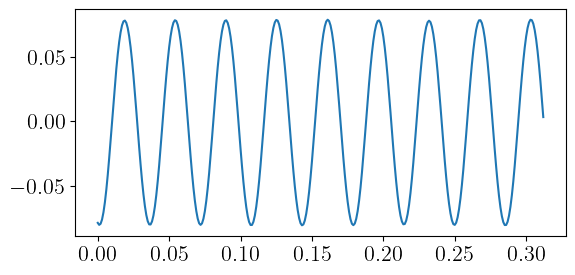

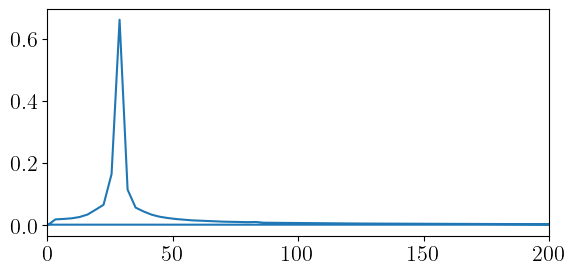

Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/POD_Mode_PSI_1.png Saved
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/fft_POD_Mode_PSI_1.png Saved


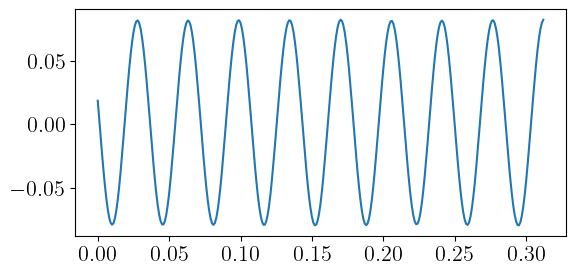

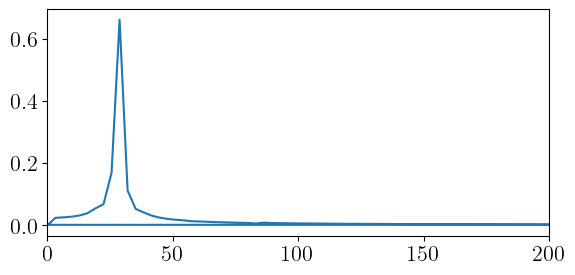

Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/POD_Mode_PSI_2.png Saved
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/fft_POD_Mode_PSI_2.png Saved


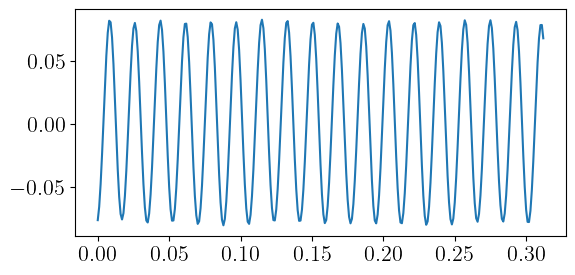

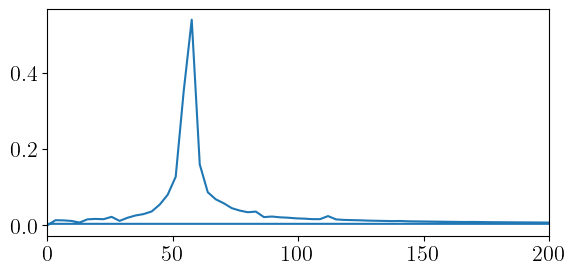

Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/POD_Mode_PSI_3.png Saved
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/fft_POD_Mode_PSI_3.png Saved


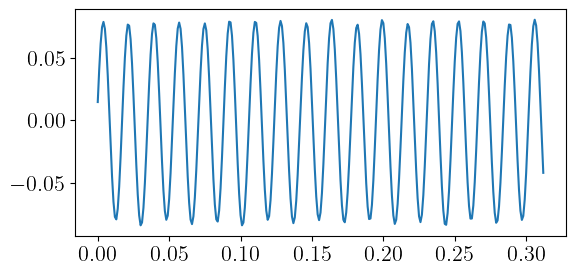

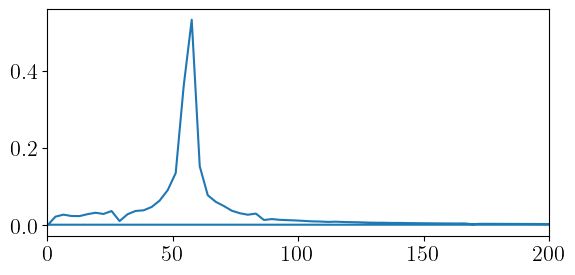

Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/POD_Mode_PSI_4.png Saved
Tutorial_3_kPOD_vs_POD_Cyl/POD_Results_Cylinder_CFD/fft_POD_Mode_PSI_4.png Saved


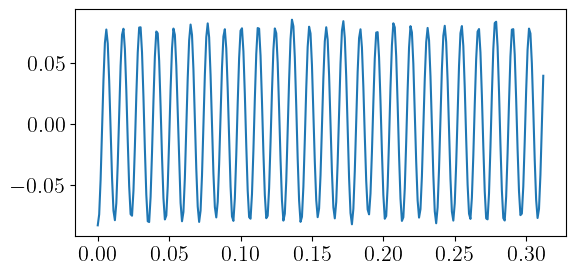

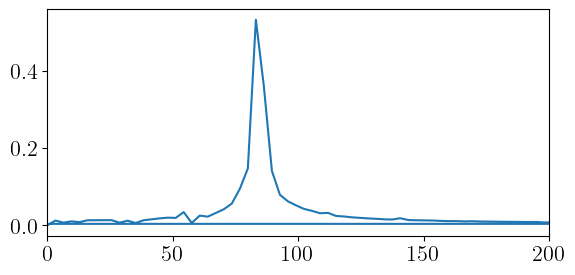

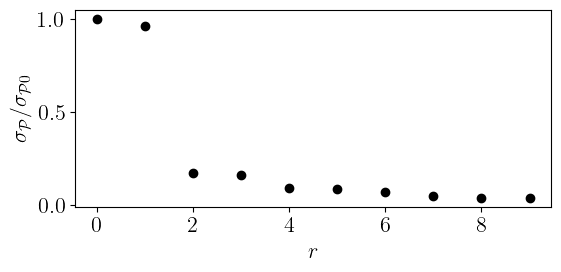

Exporting images...
Preparing images...


'Gif Created'

In [5]:
FOLDER_POD_RESULTS=FOLDER+os.sep+'POD_Results_Cylinder_CFD'

# This time we remove the mean:
D,D_MEAN=ReadData._data_processing(D,MR=True)
# We extend the mean to rebuild the flow
D_MEAN_mat=np.array([D_MEAN, ] * n_t).transpose()    

# --- Initialize MODULO object
m = ModuloVKI(data=D,svd_solver='svd_scipy_sparse')

Phi_POD, Psi_POD, Sigma_POD = m.POD(mode='svd')
# We here plot the POD modes and their structures
U_D=Phi_POD[0:nxny,:]
V_D=Phi_POD[nxny::,:]

for K in range(5):
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Mode_'+str(K)+'.png'
 plt.title('$\Phi_{\mathcal{P}}(\mathbf{x}_i)$',fontsize=18)
 Plot_2D_CFD_Cyl(Xg,Yg,U_D,V_D,k=K,CL=0,Name=Name); plt.close('all')
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 plt.plot(t,Psi_POD[:,K])
 plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Mode_PSI_'+str(K)+'.png' 
 print(Name+' Saved')
 plt.savefig(Name, dpi=300)
 fig, ax = plt.subplots(figsize=(6, 3)) # plot also the spectra
 Signal_FFT = np.fft.fft(Psi_POD[:,K])/np.sqrt(n_t) # Compute the DFT
 plt.plot(Freqs,np.abs(Signal_FFT))
 plt.xlim([0,200])
 plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
 Name=FOLDER_POD_RESULTS+os.sep+'fft_POD_Mode_PSI_'+str(K)+'.png' 
 print(Name+' Saved')
 plt.savefig(Name, dpi=300)    
 plt.show()

# Plot the sigma POD
fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
plt.plot(Sigma_POD/Sigma_POD[0],'ko') 
ax.set_xlabel('$r$',fontsize=16)
ax.set_ylabel('$\sigma_{\mathcal{P}}/\sigma_{\mathcal{P}0}$',fontsize=16)
plt.tight_layout()
Name=FOLDER_POD_RESULTS+os.sep+'Sigma_P.png'
plt.savefig(Name, dpi=300) 
plt.show()

# Here is the approximation with the leading 3 POD modes (we have seen this in ex 01.)
R=2
D_P=np.real(np.linalg.multi_dot([Phi_POD[:,0:R],
                                 np.diag(Sigma_POD[0:R]),
                                 Psi_POD[:,0:R].T]) )
Error=np.linalg.norm(m.D-D_P)/np.linalg.norm(m.D)

Name_GIF=FOLDER_POD_RESULTS+os.sep+'Animation_POD_Approximation.gif'   
Animation_2D_CFD_Cyl(Name_GIF,D_P+D_MEAN_mat,Xg,Yg,1,100,1)

##### Compute the kPOD with various k_m's
we need to define the value it should take between two arbitrary snapshots. In this case, we pick the snapshot 1 and 19 (the furthest away in the cycle) and impose that the kernel is equal to k_m between these two snapshots. This is our way to say to MODULO that we epect these two snapshots to be considered as "very different". How much it depends on how low we set k_m. 

*Test*:  start with k=0.5 then decrease it to almost 0 (say 1e-12) 

When k_m is relatively large (of the order of 0.5), the result is basically a POD. This is because it leads to very small gamma, so that the gaussian is nearly flat and the matrix K is approximately ||X_i-X_j||_2. At this limit, the kPOD becomes MDS (multidimentional scaling): the matrix K is replaced by the matrix of Eucledean distances and this has the same eigenstructure of the temporal correlation matrix 
(see [this](https://arxiv.org/abs/2208.07746))

When k_m is approximately 0, the values of K are as diverse as possible.
But the result is a kernel which decreases too quickly: snapshots that are supposedly similar are considered very dissimilar. 


In [ ]:
FOLDER_kPOD_RESULTS=FOLDER+os.sep+'kPOD_Results_Cylinder_CFD'
# -- Now we proceed with the new kernel POD. We try three values of k_m
M_DIST=[1,19]
Phi_kPOD_0, Psi_kPOD_0, Sigma_kPOD_0,K_zeta_0 = m.kPOD(M_DIST=M_DIST,k_m=0.5,cent=True, K_out=True)
Phi_kPOD_1, Psi_kPOD_1, Sigma_kPOD_1,K_zeta_1 = m.kPOD(M_DIST=M_DIST,k_m=1e-2,cent=True, K_out=True)
Phi_kPOD_2, Psi_kPOD_2, Sigma_kPOD_2,K_zeta_2 = m.kPOD(M_DIST=M_DIST,k_m=1e-12,cent=True, K_out=True)
K_POD=D.T.dot(D)

fig, ax = plt.subplots(2,4,figsize=(20, 10)) # This creates the figure
# Column 1: the K
ax[0,0].imshow(K_POD)
ax[0,0].set(title='$K=D^TD$')
ax[1,0].plot(K_POD[150,:]/K_POD[150,150])
ax[1,0].set(title='$K(150,:)/K(150,150)$')
ax[1,0].set(xlabel='$k$ (snapshot)')

# Column 2: the K_xi with k_m=0.1
ax[0,1].imshow(K_zeta_0)
ax[0,1].set(title='$K_\\xi (\kappa_m=0.5)$')
ax[1,1].plot(K_zeta_0[150,:]/K_zeta_0[150,150])
ax[1,1].set(title='$K_\\xi(150,:)/K_\\xi(150,150)$')
ax[1,1].set(xlabel='$k$ (snapshot)')

# Column 3: the K_xi with k_m=1e-2
ax[0,2].imshow(K_zeta_1)
ax[0,2].set(title='$K_\\xi (\kappa_m=1e-2)$')
ax[1,2].plot(K_zeta_1[150,:]/K_zeta_1[150,150])
ax[1,2].set(title='$K_\\xi(150,:)/K_\\xi(150,150)$')
ax[1,3].set(xlabel='$k$ (snapshot)')

# Column 4: the K_xi with k_m=1e-12
ax[0,3].imshow(K_zeta_2)
ax[0,3].set(title='$K_\\xi (\kappa_m=1e-12)$')
ax[1,3].plot(K_zeta_2[150,:]/K_zeta_2[150,150])
ax[1,3].set(title='$K_\\xi(150,:)/K_\\xi(150,150)$')
ax[1,3].set(xlabel='$k$ (snapshot)')

plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
Name=FOLDER_kPOD_RESULTS+os.sep+'K_Matrices.png' 
print(Name+' Saved')
plt.savefig(Name, dpi=300)  
plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:33: SyntaxWarning: invalid escape sequence '\k'
<>:19: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:33: SyntaxWarning: invalid escape sequence '\k'
/var/folders/yy/6s27989914q94sycbl2gz1v00000gn/T/ipykernel_65142/662013270.py:19: SyntaxWarning: invalid escape sequence '\k'
  ax[0,1].set(title='$K_\\xi (\kappa_m=0.5)$')
/var/folders/yy/6s27989914q94sycbl2gz1v00000gn/T/ipykernel_65142/662013270.py:26: SyntaxWarning: invalid escape sequence '\k'
  ax[0,2].set(title='$K_\\xi (\kappa_m=1e-2)$')
/var/folders/yy/6s27989914q94sycbl2gz1v00000gn/T/ipykernel_65142/662013270.py:33: SyntaxWarning: invalid escape sequence '\k'
  ax[0,3].set(title='$K_\\xi (\kappa_m=1e-12)$')


Note that at large k_m, the matrix tends to look like K. At much smaller ones, it only focuses on a specific frequency. The matrix is Toeplitz, and its eigenvectors tends naturally towards the Fourier basis. It looks a lot like the filtering as in the SPOD_s but with more pronounced focus on a specific frequency range.

In [ ]:

# We here plot the kPOD modes and their structures. Take the case 1.
U_D=Phi_kPOD_1[0:nxny,:]
V_D=Phi_kPOD_1[nxny::,:]

for K in range(6):
  Name=FOLDER_kPOD_RESULTS+os.sep+'kPOD_Mode_'+str(K)+'.png'
  plt.title('$\Phi_{\mathcal{K}}(\mathbf{x}_i)$',fontsize=18)
  Plot_2D_CFD_Cyl(Xg,Yg,U_D,V_D,k=K,CL=0,Name=Name)
  fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
  plt.plot(t,Psi_kPOD_1[:,K])
  plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
  Name=FOLDER_kPOD_RESULTS+os.sep+'kPOD_Mode_PSI_'+str(K)+'.png' 
  print(Name+' Saved')
  plt.savefig(Name, dpi=300); plt.close('all')  
  fig, ax = plt.subplots(figsize=(6, 3)) # plot also the spectra
  Signal_FFT = np.fft.fft(Psi_kPOD_1[:,K])/np.sqrt(n_t) # Compute the DFT
  plt.plot(Freqs,np.abs(Signal_FFT))
  plt.xlim([0,200])
  plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
  Name=FOLDER_kPOD_RESULTS+os.sep+'fft_kPOD_Mode_PSI_'+str(K)+'.png' 
  print(Name+' Saved')
  plt.savefig(Name, dpi=300)  
  plt.show()


# Plot the sigma kPOD
fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
plt.plot(Sigma_kPOD_1/Sigma_kPOD_1[0],'rs',label='kPOD') 
plt.plot(Sigma_POD/Sigma_POD[0],'ko',label='POD')
plt.legend() 
ax.set_yscale('log')
ax.set_xlabel('$r$',fontsize=16)
ax.set_ylabel('$\sigma_{\mathcal{K}}$',fontsize=16)
plt.tight_layout()
Name=FOLDER_kPOD_RESULTS+os.sep+'Sigma_P_vs_K.png'
plt.show()
plt.savefig(Name, dpi=300) 


# Here is the approximation with the leading 3 POD modes
R=6
D_kP=np.real(np.linalg.multi_dot([Phi_kPOD_1[:,0:R],
                                 np.diag(Sigma_kPOD_1[0:R]),
                                 Psi_kPOD_1[:,0:R].T]) )
error_kpod=np.linalg.norm(m.D-D_kP)/np.linalg.norm(m.D)

print('Error kPOD = {} (R={})'.format(error_kpod, R))
Name_GIF=FOLDER_kPOD_RESULTS+os.sep+'Animation_Approximation.gif'   
Animation_2D_CFD_Cyl(Name_GIF,D_kP+D_MEAN_mat,Xg,Yg,1,100,1)
plt.close('all')

##### Plot side by side (Optional)
The rest of the code is to plot the various modes side by side

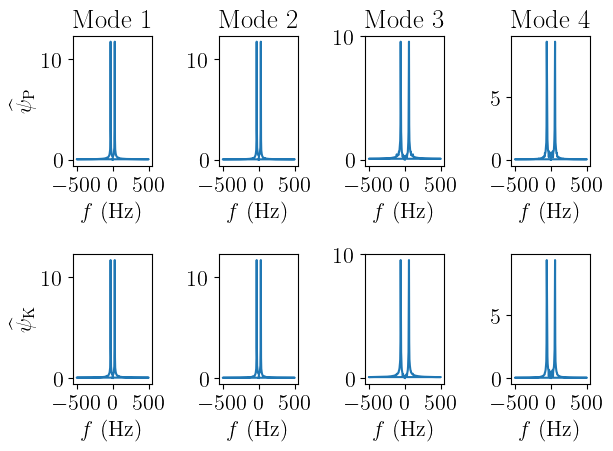

C:\Users\mendez\AppData\Local\Temp\ipykernel_9308\1160106644.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)


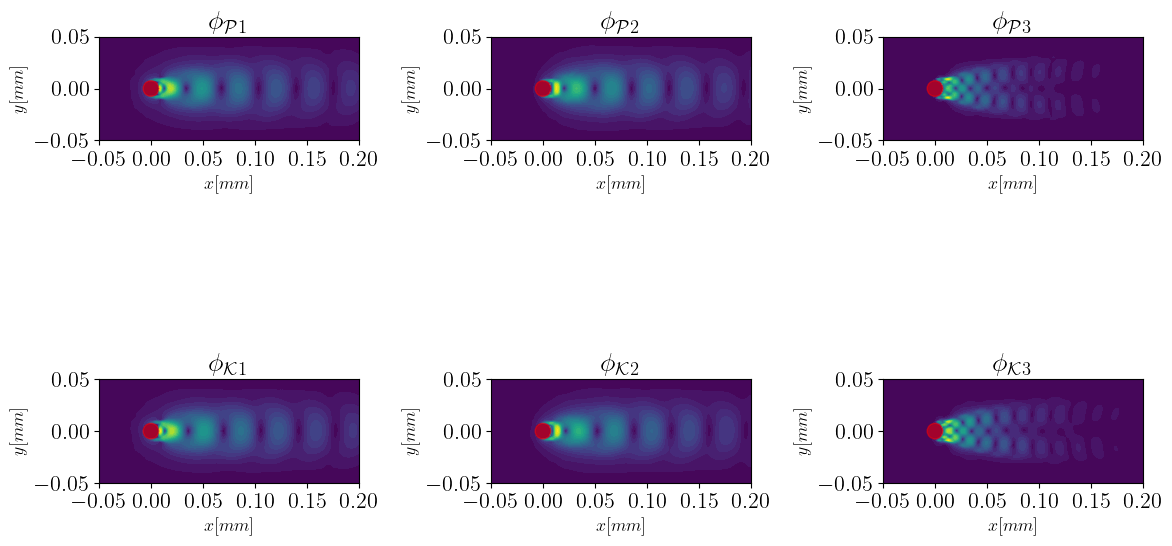

In [ ]:
# here we plot these side by side: 
fig, axs = plt.subplots(2, 4)

for i in range(4):
    
    Signal_kpod=Psi_kPOD_0[:, i]
    s_h_kpod=np.abs((np.fft.fft(Signal_kpod-Signal_kpod.mean())))
    

    Signal_pod=Psi_POD[:, i]
    s_h_pod=np.abs((np.fft.fft(Signal_pod-Signal_pod.mean())))
        
    axs[0, i].plot(Freqs, s_h_pod)
    axs[1, i].plot(Freqs, s_h_kpod)
    
    if i == 0: 
        axs[0, i].set(ylabel='$\widehat{\psi}_{\mathrm{P}}$')
        axs[1, i].set(ylabel='$\widehat{\psi}_{\mathrm{K}}$')
        
    axs[0, i].set(title='Mode {}'.format(int(i + 1)))
    axs[0, i].set(xlabel='$f$ (Hz)')
    axs[1, i].set(xlabel='$f$ (Hz)')

fig.tight_layout()
plt.show()

# %% Spatial Structures

# Modes comparison for different decompositions
def get_psi_plot_cylinder(Xg,Yg,U,V,k=10,CL=16,Name='', ax=None):
    n_x,n_y=np.shape(Xg)
    U_g=U[:,k].reshape(n_y,n_x).T
    V_g=V[:,k].reshape(n_y,n_x).T
    
    ax.contourf(Xg,Yg,np.sqrt(U_g**2+V_g**2),30)
    # plt.quiver(Xg,Yg,U_g,V_g,scale=10000)
    ax.set_aspect('equal') # Set equal aspect ratio
    ax.set_xlabel('$x[mm]$',fontsize=13)
    ax.set_ylabel('$y[mm]$',fontsize=13)
    #ax.set_title('Tutorial 2: Cylinder Wake',fontsize=12)
    ax.set_xticks(np.arange(-0.1,0.2,0.05))
    ax.set_yticks(np.arange(-0.1,0.1,0.05))
    ax.set_xlim([-0.05,0.2])
    ax.set_ylim(-0.05,0.05)
    
    circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)
    ax.add_patch(circle)
    return 

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

U_POD=Phi_POD[0:nxny,:]
V_POD=Phi_POD[nxny::,:]

U_kPOD=Phi_kPOD_1[0:nxny,:]
V_kPOD=Phi_kPOD_1[nxny::,:]


U = [U_POD, U_kPOD] 
V = [V_POD, V_kPOD]

i = 0
# Loop through the rows and columns to populate the subplots
for row in range(rows):
    Ui, Vi = U[row], V[row]
    
    for col in range(cols):
        #plt.sca(axs[row, col])  # Set the current subplot
        # Call your function to generate a plot
        get_psi_plot_cylinder(Xg,Yg,Ui,Vi,k=col,CL=0,Name=Name, ax=axs[row, col]) 
        if row==0:
          axs[row, col].set(title='$\phi_{\mathcal{P}' + str(int(col + 1))+'}$')  
        else:   
          axs[row, col].set(title='$\phi_{\mathcal{K}' + str(int(col + 1))+'}$')      
    
fig.tight_layout()
plt.show()
